In [34]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
import matplotlib.pyplot as plt

In [6]:
#importing the dataset and cleaning
data = pd.read_csv('breast-cancer-wisconsin.data', header=None, index_col=0)
data.columns = ['Clump thickness', 'Cell Size', 'Cell shape', 'Marginal','Epithelial Cell Size', \
               'Bare Nuclei', 'Chromatin', 'Normal Nucleoli', 'Mitoses', 'class']
data['class'].replace(2, 'Benign',inplace=True)
data['class'].replace(4, 'Malignant',inplace=True)
to_drop =['?']
data_clean = data[~data['Bare Nuclei'].isin(to_drop)]
Y = data_clean['class']
data_clean.head()

,Clump thickness,Cell Size,Cell shape,Marginal,Epithelial Cell Size,Bare Nuclei,Chromatin,Normal Nucleoli,Mitoses,class
0,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,Benign
1002945,5,4,4,5,7,10,3,2,1,Benign
1015425,3,1,1,1,2,2,3,1,1,Benign
1016277,6,8,8,1,3,4,3,7,1,Benign
1017023,4,1,1,3,2,1,3,1,1,Benign


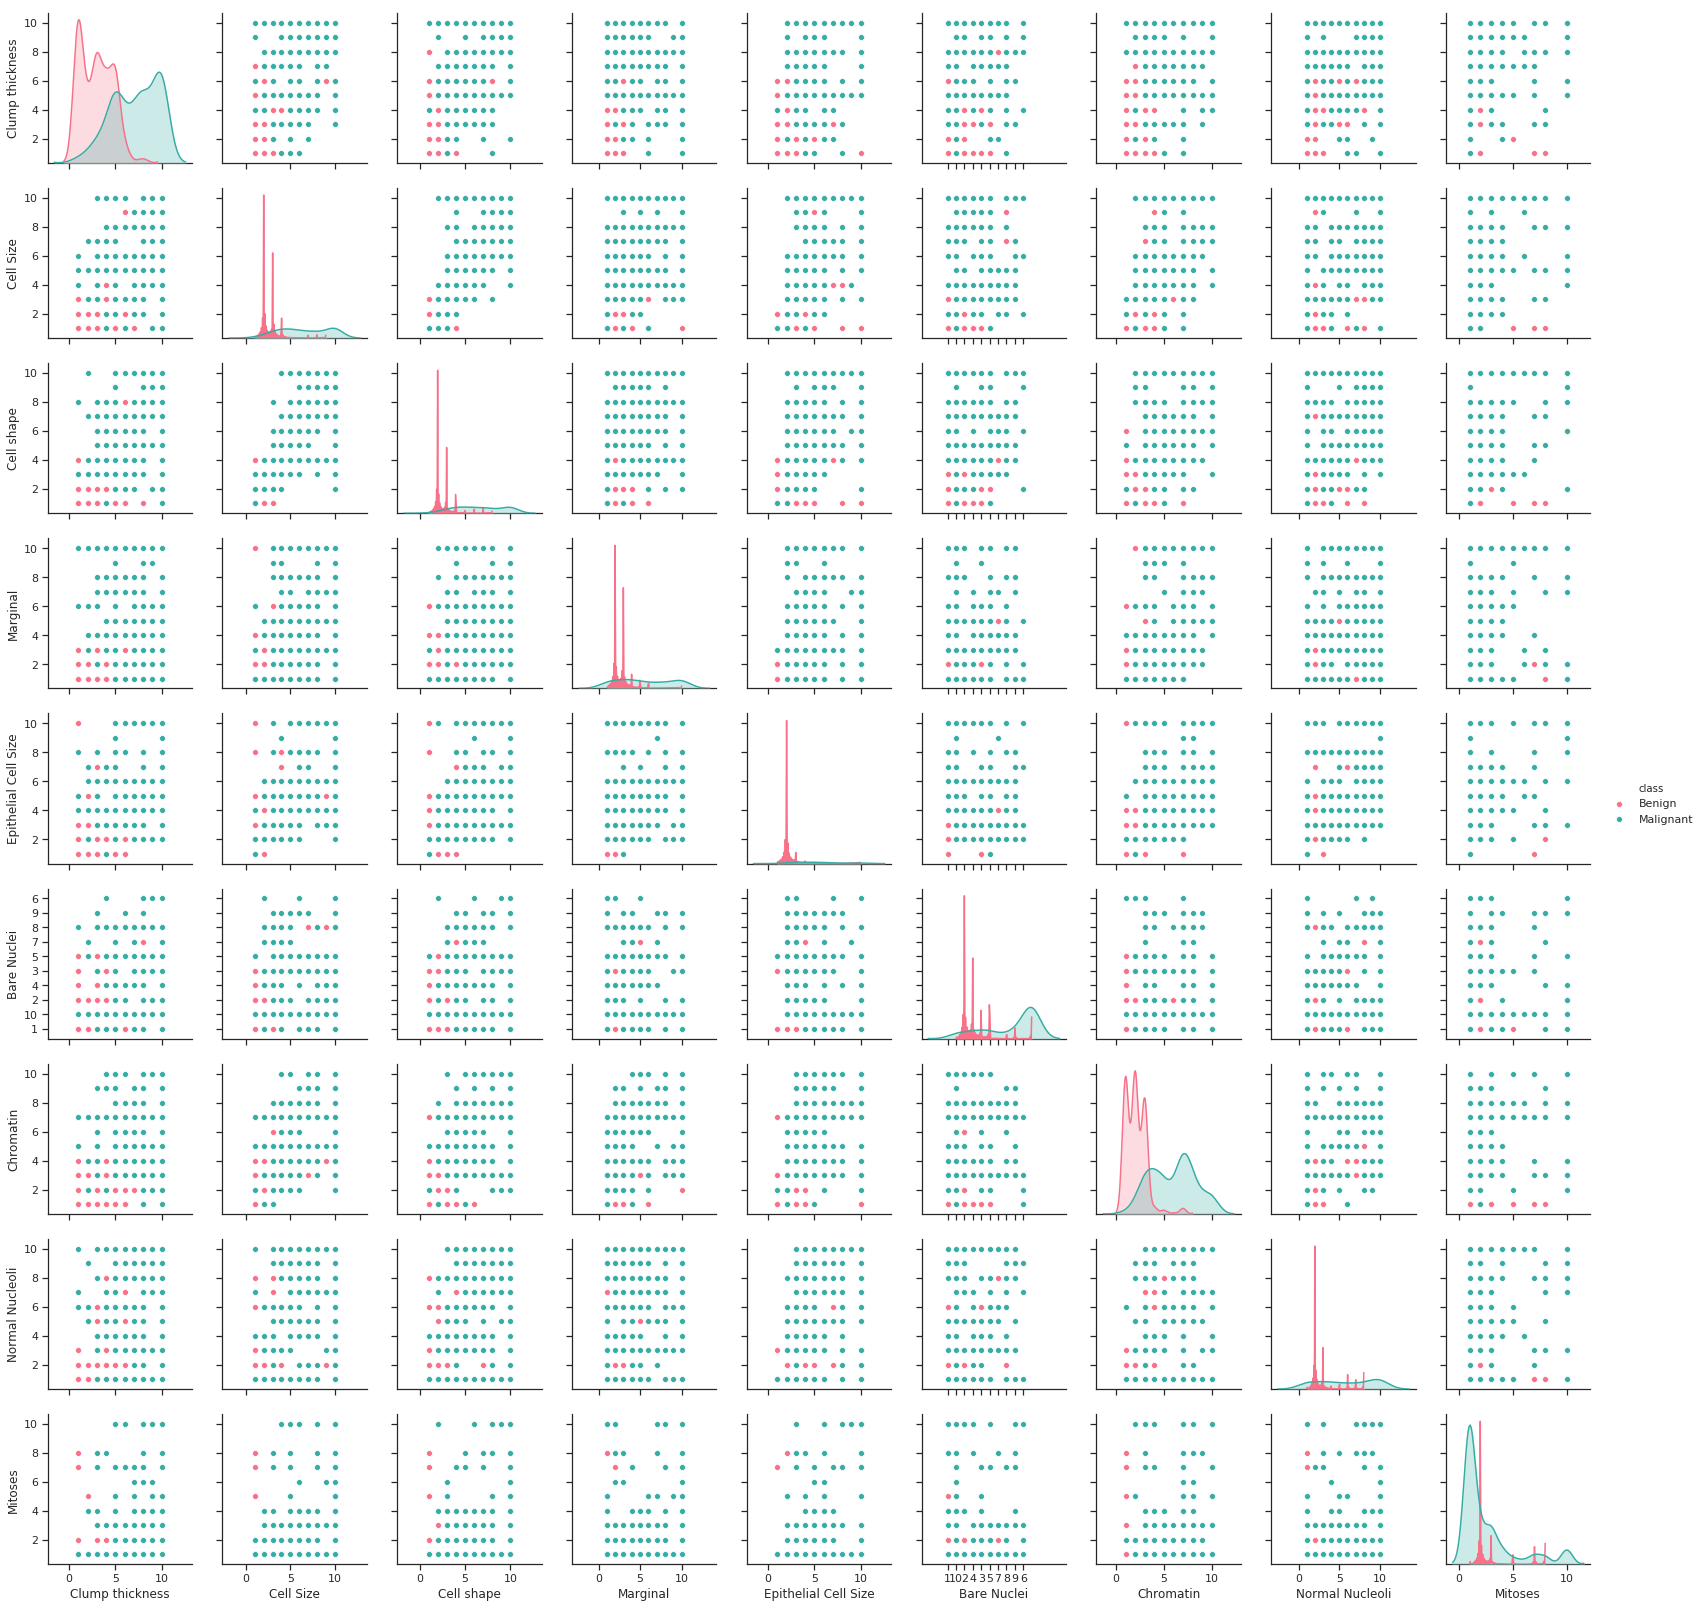

In [7]:
g = sns.pairplot(data_clean, hue="class", palette="husl")

In [8]:
corr_matrix = data_clean.corr() 
print(corr_matrix['Chromatin'].sort_values(ascending=False))

Chromatin               1.000000
Cell Size               0.755559
Cell shape              0.735344
Marginal                0.668567
Normal Nucleoli         0.665602
Epithelial Cell Size    0.618128
Clump thickness         0.553742
Mitoses                 0.346011
Name: Chromatin, dtype: float64


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

class
Benign       [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
Malignant    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

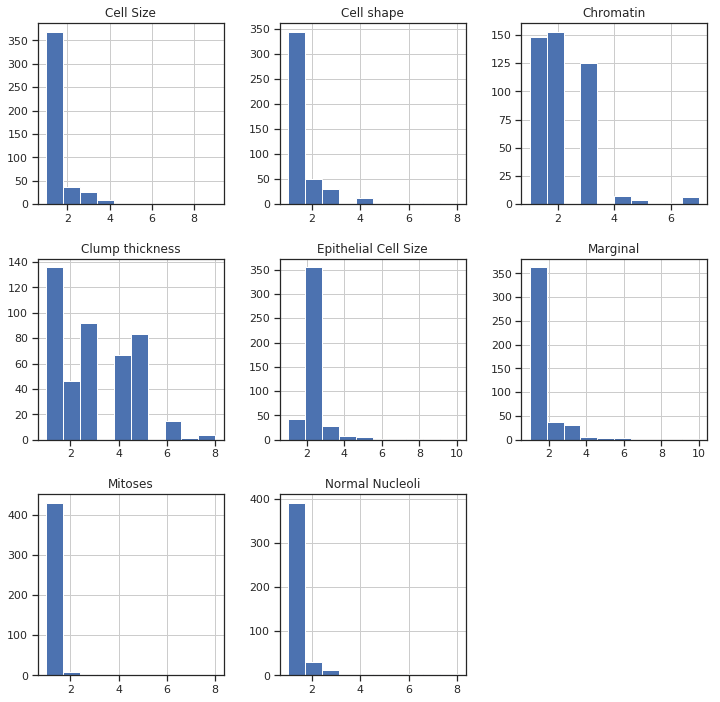

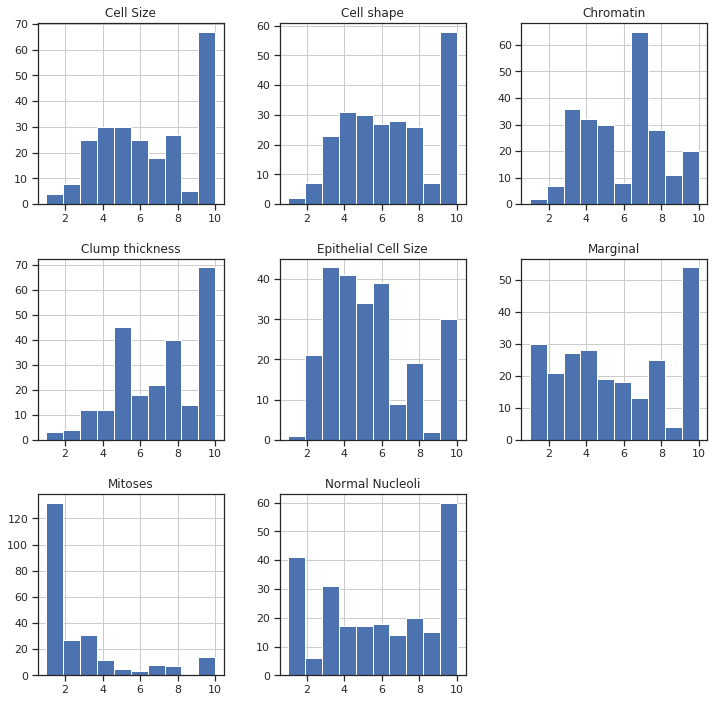

In [10]:
#Visualization of data
data_clean.groupby('class').hist(figsize=(12, 12))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_clean.drop(columns=['class']), Y, test_size=0.2, random_state=42)

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train, y_train)
Y_pred = clf_svm.predict(X_test)
cm = confusion_matrix(y_test, Y_pred)
c = (cm[0, 0] + cm[1, 1])/len(y_test)
print('Accuracy is {:3.2f} %'.format(c*100))

Accuracy is 96.35 %


In [41]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, Y_pred)
c = (cm[0, 0] + cm[1, 1])/len(y_test)
print('Accuracy is {:3.2f} %'.format(c*100))

Accuracy is 95.62 %


In [42]:
from sklearn.ensemble import RandomForestClassifier
RFcw = RandomForestClassifier(random_state=40, n_estimators = 50, min_samples_leaf=5, class_weight="balanced")
RFcw.fit(X_train, y_train)
Y_pred = RFcw.predict(X_test)
cm = confusion_matrix(y_test, Y_pred)
c = (cm[0, 0] + cm[1, 1])/len(y_test)
print('Accuracy is {:3.2f} %'.format(c*100))

Accuracy is 97.08 %


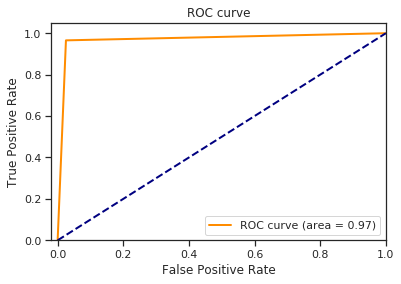

In [44]:
#plot ROC curve
fpr, tpr, _ = roc_curve(Y_pred, y_test)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()